## Description about this notebook
This notebook is designed to visually compare the performance of our three different YOLO NAS models (Small, Medium, Large) in terms of two key metrics: Mean Average Precision at 50% (MAP50) and Mean Average Precision from 50% to 95% (MAP50:95). We employed a supervision function for this evaluation. The assessment was carried out on a test dataset, which was not previously exposed to the models. This test dataset is unique as it comprises a new blend of Jersey and Holstein cow images, captured from two distinct camera perspectives: top and side views. This setup ensures a comprehensive evaluation of the models' ability to accurately detect and recognize objects in varied and realistic scenarios.

In [1]:
import os
from ultralytics import NAS
os.chdir("..")
ROOT = os.getcwd()
print(ROOT)


/Users/mautushid/github/Cowsformer


In [2]:
from models.nas import *
import pandas as pd
import matplotlib.pyplot as plt

The console stream is logged into /Users/mautushid/sg_logs/console.log


[2024-01-25 23:40:46] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2024-01-25 23:40:47] WARNING - __init__.py - Failed to import pytorch_quantization
[2024-01-25 23:40:48] WARNING - redirects.py - NOTE: Redirects are currently not supported in Windows or MacOs.
[2024-01-25 23:40:58] WARNING - calibrator.py - Failed to import pytorch_quantization
[2024-01-25 23:40:58] WARNING - export.py - Failed to import pytorch_quantization
[2024-01-25 23:40:58] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2024-01-25 23:40:58] WARNING - env_sanity_check.py - Failed to verify operating system: Deci officially supports only Linux kernels. Some features may not work as expected.


In [3]:
path_model = 'yolo_nas_m' 
dir_train = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/train"
dir_val = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/val"
dir_test = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/test"
name_task = "cow200"

data_yaml_path = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/data.yaml"
finetuned_model_path_m_10 = ["/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_10/n10_yolo_na_i1_exp_yolo_nas_m_10_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_10/n10_yolo_na_i2_exp_yolo_nas_m_10_2/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_10/n10_yolo_na_i3_exp_yolo_nas_m_10_3/ckpt_best.pth",
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_10/n10_yolo_na_i4_exp_yolo_nas_m_10_4/ckpt_best.pth"]


finetuned_model_path_m_25 = ["/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_25/n25_yolo_na_i1_exp_yolo_nas_m_25_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_25/n25_yolo_na_i2_exp_yolo_nas_m_25_2/ckpt_best.pth", 
                         "/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_25/n25_yolo_na_i3_exp_yolo_nas_m_25_3/ckpt_best.pth",
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_25/n25_yolo_na_i4_exp_yolo_nas_m_25_4/ckpt_best.pth"]

finetuned_model_path_m_50 = ["/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_50/n50_yolo_na_i1_exp_yolo_nas_m_50_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_50/n50_yolo_na_i2_exp_yolo_nas_m_50_2/ckpt_best.pth", 
                         "/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_50/n50_yolo_na_i3_exp_yolo_nas_m_50_3/ckpt_best.pth",
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_50/n50_yolo_na_i4_exp_yolo_nas_m_50_4/ckpt_best.pth"]

finetuned_model_path_m_100 = ["/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_100/n100_yolo_na_i1_exp_yolo_nas_m_100_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_100/n100_yolo_na_i2_exp_yolo_nas_m_100_2/ckpt_best.pth", 
                         "/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_100/n100_yolo_na_i3_exp_yolo_nas_m_100_3/ckpt_best.pth"]


finetuned_model_path_m_200 = ["/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_200/n200_yolo_na_i1_exp_yolo_nas_m_200_1/ckpt_best.pth", 
                        "/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_200/n200_yolo_na_i2_exp_yolo_nas_m_200_2/ckpt_best.pth", 
                         "/Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_200/n200_yolo_na_i3_exp_yolo_nas_m_200_3/ckpt_best.pth"]

### Creating instance of Niche_YOLO_NAS class
my_nas = Niche_YOLO_NAS(path_model, dir_train, dir_val, dir_test, name_task)

[2024-01-25 23:40:59] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2024-01-25 23:40:59] INFO - checkpoint_utils.py - Successfully loaded pretrained weights for architecture yolo_nas_m


In [4]:
# Assuming my_nas is an instance of Niche_YOLO_NAS with methods load() and get_map_scores()
# and that path_model, data_yaml_path, and finetuned_model_path_m_* variables are defined as shown before

# Lists to hold evaluation results for each dataset size
evaluation_results_m_10 = []
evaluation_results_m_25 = []
evaluation_results_m_50 = []
evaluation_results_m_100 = []
evaluation_results_m_200 = []

# Function to process a list of models
def evaluate_models(finetuned_model_paths):
    models = []
    evaluation_results = []
    
    # Load models
    for path in finetuned_model_paths:
        model = my_nas.load(path_model, path)
        models.append(model)
    
    # Evaluate models
    for model in models:
        metrics = my_nas.get_map_scores(model, data_yaml_path, "test")
        evaluation_results.append(metrics)
    
    return evaluation_results

# Evaluate models fine-tuned with different dataset sizes
evaluation_results_m_10 = evaluate_models(finetuned_model_path_m_10)
evaluation_results_m_25 = evaluate_models(finetuned_model_path_m_25)
evaluation_results_m_50 = evaluate_models(finetuned_model_path_m_50)
evaluation_results_m_100 = evaluate_models(finetuned_model_path_m_100)
evaluation_results_m_200 = evaluate_models(finetuned_model_path_m_200)

# Now you have evaluation results for each dataset size
# You can calculate averages, plot results, etc., using these lists of dictionaries or DataFrames


[2024-01-25 23:41:01] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_10/n10_yolo_na_i1_exp_yolo_nas_m_10_1/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2024-01-25 23:41:02] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_10/n10_yolo_na_i2_exp_yolo_nas_m_10_2/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2024-01-25 23:41:03] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_10/n10_yolo_na_i3_exp_yolo_nas_m_10_3/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2024-01-25 23:41:04] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_10/n10_yolo_na_i4_exp_yolo_nas_m_10_4/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


/Users/mautushid/miniconda3/envs/myenv/lib/python3.9/site-packages/numpy/lib/arraypad.py:487: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x)
/Users/mautushid/miniconda3/envs/myenv/lib/python3.9/site-packages/torch/amp/autocast_mode.py:202: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')
[2024-01-25 23:41:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 23:41:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 23:41

model yolo_nas_m loaded


[2024-01-25 23:44:01] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_25/n25_yolo_na_i2_exp_yolo_nas_m_25_2/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2024-01-25 23:44:03] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_25/n25_yolo_na_i3_exp_yolo_nas_m_25_3/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2024-01-25 23:44:04] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_25/n25_yolo_na_i4_exp_yolo_nas_m_25_4/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2024-01-25 23:44:04] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 23:44:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 23:44:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 23:44:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 23:44:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 23:44:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 23:44:07] INFO -

model yolo_nas_m loaded


[2024-01-25 23:46:58] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_50/n50_yolo_na_i2_exp_yolo_nas_m_50_2/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2024-01-25 23:46:59] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_50/n50_yolo_na_i3_exp_yolo_nas_m_50_3/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2024-01-25 23:47:01] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_50/n50_yolo_na_i4_exp_yolo_nas_m_50_4/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2024-01-25 23:47:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 23:47:01] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 23:47:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 23:47:02] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 23:47:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 23:47:03] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 23:47:03] INFO -

model yolo_nas_m loaded


[2024-01-25 23:50:03] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_100/n100_yolo_na_i2_exp_yolo_nas_m_100_2/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2024-01-25 23:50:05] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_100/n100_yolo_na_i3_exp_yolo_nas_m_100_3/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2024-01-25 23:50:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 23:50:05] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 23:50:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 23:50:06] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 23:50:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 23:50:07] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 23:50:07] INFO -

model yolo_nas_m loaded


[2024-01-25 23:52:20] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_200/n200_yolo_na_i2_exp_yolo_nas_m_200_2/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2024-01-25 23:52:21] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/lms_checkpoints/yolo_m_200/n200_yolo_na_i3_exp_yolo_nas_m_200_3/ckpt_best.pth EMA checkpoint.


model yolo_nas_m loaded


[2024-01-25 23:52:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 23:52:22] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 23:52:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 23:52:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 23:52:23] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 23:52:24] INFO - pipelines.py - Fusing some of the model's layers. If this takes too much memory, you can deactivate it by setting `fuse_model=False`
[2024-01-25 23:52:24] INFO -

In [5]:
evaluation_results_m_10
#evaluation_results_m_25 = []
#evaluation_results_m_50 = []
#evaluation_results_m_100 = []
#evaluation_results_m_200 = []

[{'mAP@50': 0.42217331744316033, 'mAP@50:95': 0.1900697509845672},
 {'mAP@50': 0.42708789909304506, 'mAP@50:95': 0.1862877770254908},
 {'mAP@50': 0.46809914170980976, 'mAP@50:95': 0.19695421385453027},
 {'mAP@50': 0.4494788554565344, 'mAP@50:95': 0.18209561049411777}]

In [6]:
df_m10 = pd.DataFrame(evaluation_results_m_10)
df_m25 = pd.DataFrame(evaluation_results_m_25)
df_m50 = pd.DataFrame(evaluation_results_m_50)
df_m100 = pd.DataFrame(evaluation_results_m_100)
df_m200 = pd.DataFrame(evaluation_results_m_200)


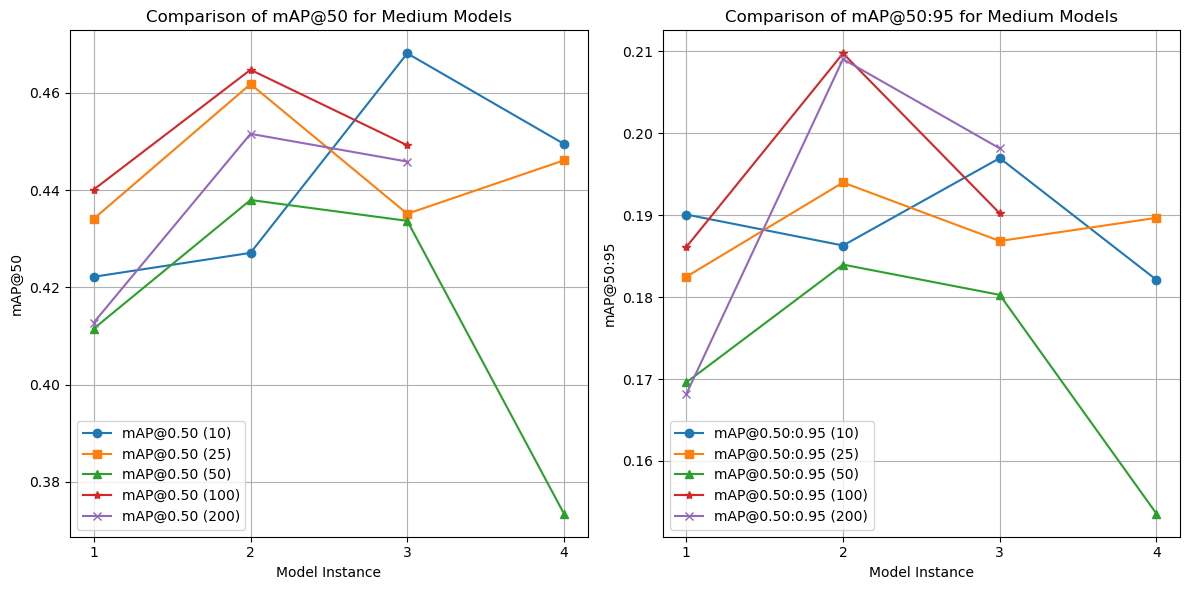

In [7]:

# Convert the lists of evaluation results into DataFrames
df_m_10 = pd.DataFrame(evaluation_results_m_10)
df_m_25 = pd.DataFrame(evaluation_results_m_25)
df_m_50 = pd.DataFrame(evaluation_results_m_50)
df_m_100 = pd.DataFrame(evaluation_results_m_100)
df_m_200 = pd.DataFrame(evaluation_results_m_200)

# Specific model labels corresponding to data sizes
model_labels = ['10', '25', '50', '100', '200']


plt.figure(figsize=(12, 6))

# mAP@0.50 Plot for Medium models
plt.subplot(1, 2, 1)
plt.plot(df_m_10['mAP@50'], '-o', label='mAP@0.50 (10)')
plt.plot(df_m_25['mAP@50'], '-s', label='mAP@0.50 (25)')
plt.plot(df_m_50['mAP@50'], '-^', label='mAP@0.50 (50)')
plt.plot(df_m_100['mAP@50'], '-*', label='mAP@0.50 (100)')
plt.plot(df_m_200['mAP@50'], '-x', label='mAP@0.50 (200)')
plt.title('Comparison of mAP@50 for Medium Models')
plt.xlabel('Model Instance')
plt.ylabel('mAP@50')
plt.xticks(range(len(df_m_10)), range(1, len(df_m_10) + 1))
plt.legend()
plt.grid(True)

# mAP@0.50:0.95 Plot for Medium models
plt.subplot(1, 2, 2)
plt.plot(df_m_10['mAP@50:95'], '-o', label='mAP@0.50:0.95 (10)')
plt.plot(df_m_25['mAP@50:95'], '-s', label='mAP@0.50:0.95 (25)')
plt.plot(df_m_50['mAP@50:95'], '-^', label='mAP@0.50:0.95 (50)')
plt.plot(df_m_100['mAP@50:95'], '-*', label='mAP@0.50:0.95 (100)')
plt.plot(df_m_200['mAP@50:95'], '-x', label='mAP@0.50:0.95 (200)')
plt.title('Comparison of mAP@50:95 for Medium Models')
plt.xlabel('Model Instance')
plt.ylabel('mAP@50:95')
plt.xticks(range(len(df_m_10)), range(1, len(df_m_10) + 1))
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [8]:
df_evaluation_results_m10 = pd.DataFrame(evaluation_results_m_10)
df_evaluation_results_m25 = pd.DataFrame(evaluation_results_m_25)
df_evaluation_results_m50 = pd.DataFrame(evaluation_results_m_50)
df_evaluation_results_m100 = pd.DataFrame(evaluation_results_m_100)
df_evaluation_results_m200 = pd.DataFrame(evaluation_results_m_200)

# Calculate the mean for mAP@50 and mAP@50:95
mean_mAP_50_m10 = df_evaluation_results_m10['mAP@50'].mean()
mean_mAP_50_95_m10 = df_evaluation_results_m10['mAP@50:95'].mean()

mean_mAP_50_m125 = df_evaluation_results_m25['mAP@50'].mean()
mean_mAP_50_95_m25 = df_evaluation_results_m25['mAP@50:95'].mean()

mean_mAP_50_m50 = df_evaluation_results_m50['mAP@50'].mean()
mean_mAP_50_95_m50 = df_evaluation_results_m50['mAP@50:95'].mean()
mean_mAP_50_m100 = df_evaluation_results_m100['mAP@50'].mean()
mean_mAP_50_95_m100 = df_evaluation_results_m100['mAP@50:95'].mean()
mean_mAP_50_m200 = df_evaluation_results_m200['mAP@50'].mean()
mean_mAP_50_95_m200 = df_evaluation_results_m200['mAP@50:95'].mean()



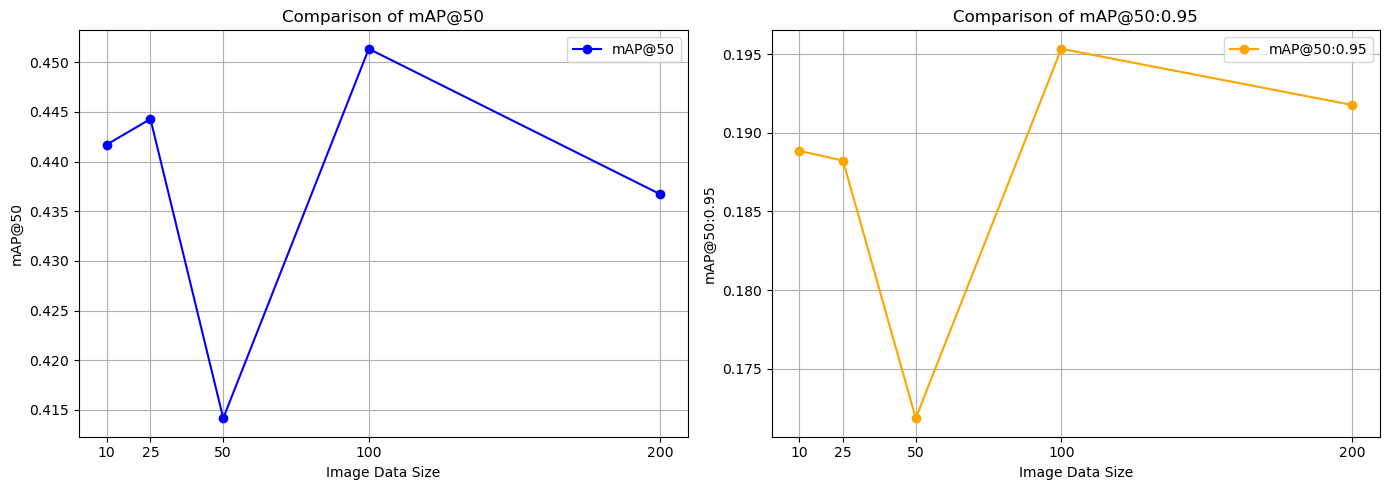

In [9]:
import matplotlib.pyplot as plt

# Given mean mAP@50 and mAP@50:95 values for different model data sizes
mean_mAP_50_values = [mean_mAP_50_m10, mean_mAP_50_m125, mean_mAP_50_m50, mean_mAP_50_m100, mean_mAP_50_m200]
mean_mAP_50_95_values = [mean_mAP_50_95_m10, mean_mAP_50_95_m25, mean_mAP_50_95_m50, mean_mAP_50_95_m100, mean_mAP_50_95_m200]
data_sizes = [10, 25, 50, 100, 200]

# Plotting the average mAP@50 and mAP@50:95 for different data sizes
plt.figure(figsize=(14, 5))

# Plot for mAP@50
plt.subplot(1, 2, 1)
plt.plot(data_sizes, mean_mAP_50_values, marker='o', linestyle='-', color='blue', label='mAP@50')
plt.title('Comparison of mAP@50')
plt.xlabel('Image Data Size')
plt.ylabel('mAP@50')
plt.xticks(data_sizes)
plt.grid(True)
plt.legend()

# Plot for mAP@50:95
plt.subplot(1, 2, 2)
plt.plot(data_sizes, mean_mAP_50_95_values, marker='o', linestyle='-', color='orange', label='mAP@50:0.95')
plt.title('Comparison of mAP@50:0.95')
plt.xlabel('Image Data Size')
plt.ylabel('mAP@50:0.95')
plt.xticks(data_sizes)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
